In [51]:
import yfinance as yf

df = yf.download(tickers='TSLA', period='10y', interval='1d')
df['Change'] = (df['Close'].shift(-1) - df['Close'])
df['Target'] = (df['Change'] > 0).astype(int)
df = df.iloc[:-1]
df.tail(30)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Change,Target
Date,,,,,,,,
2024-11-15,310.570007,324.679993,309.220001,320.720001,320.720001,114440300,18.019989,1
2024-11-18,340.730011,348.549988,330.010010,338.739990,338.739990,126547500,7.260010,1
2024-11-19,335.760010,347.380005,332.750000,346.000000,346.000000,88852500,-3.970001,0
2024-11-20,345.000000,346.600006,334.299988,342.029999,342.029999,66340700,-2.389984,0
2024-11-21,343.809998,347.989990,335.279999,339.640015,339.640015,58011700,12.919983,1
2024-11-22,341.089996,361.529999,337.700012,352.559998,352.559998,89140700,-13.970001,0
2024-11-25,360.140015,361.929993,338.200012,338.589996,338.589996,95890900,-0.359985,0
2024-11-26,341.000000,346.959991,335.660004,338.230011,338.230011,62295900,-5.339996,0
2024-11-27,341.799988,342.549988,326.589996,332.890015,332.890015,57896400,12.269989,1


In [38]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# df = df.sort_values(by="Date", ascending=True).reset_index(drop=True)


X = df[['Open', 'High', 'Low', 'Close']]
y = df['Target']

train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:]
y_val = y.iloc[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)


In [48]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric = 'logloss',
    random_state = 42
)

# param_grid = {
#     'n_estimators': [2, 5, 10, 50, 100],
#     'learning_rate': [0.01, 0.1, 0.001],
#     'max_depth': [2, 3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 10, 100]
# }

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=tscv,
    n_jobs=-1,            
    verbose=1
)

model.fit(X_train_scaled, y_train)
# grid_search.fit(X_train_scaled, y_train)
# print("Best parameters from GridSearchCV:", grid_search.best_params_)
# print("Best CV Score (acc):", grid_search.best_score_)

[02:29:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:
# best_model = grid_search.best_estimator_
# best_model.fit(X_train_scaled,y_train)


# y_val_pred = best_model.predict(X_val_scaled)
y_val_pred = model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", acc)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.5447316103379721
Confusion Matrix:
[[ 91 147]
 [ 82 183]]


In [45]:
# Check class distribution in the entire dataset
print("Overall Class Distribution:")
print(df['Target'].value_counts())

# Check class distribution in training set
print("\nTraining Set Class Distribution:")
print(y_train.value_counts())

# Check class distribution in validation set
print("\nValidation Set Class Distribution:")
print(y_val.value_counts())

Overall Class Distribution:
Target
1    1303
0    1212
Name: count, dtype: int64

Training Set Class Distribution:
Target
1    1038
0     974
Name: count, dtype: int64

Validation Set Class Distribution:
Target
1    265
0    238
Name: count, dtype: int64


Predicted Probabilities:
count    503.000000
mean       0.516250
std        0.000702
min        0.513804
25%        0.515816
50%        0.516304
75%        0.517028
max        0.517267
dtype: float64


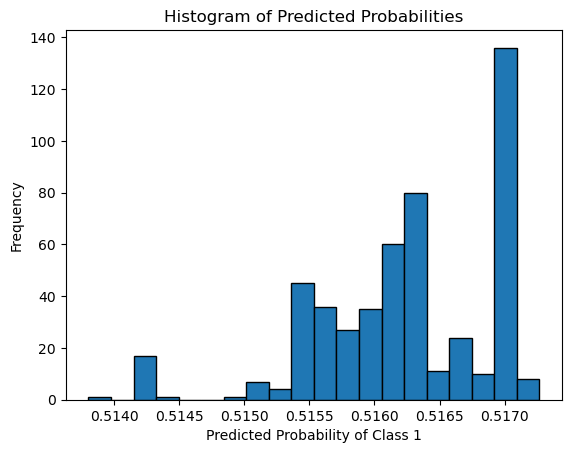

In [46]:
# Get predicted probabilities
y_val_prob = best_model.predict_proba(X_val_scaled)[:, 1]  # Probability of class 1

# Summary statistics
print("Predicted Probabilities:")
print(pd.Series(y_val_prob).describe())

# Plot histogram of predicted probabilities
import matplotlib.pyplot as plt

plt.hist(y_val_prob, bins=20, edgecolor='k')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

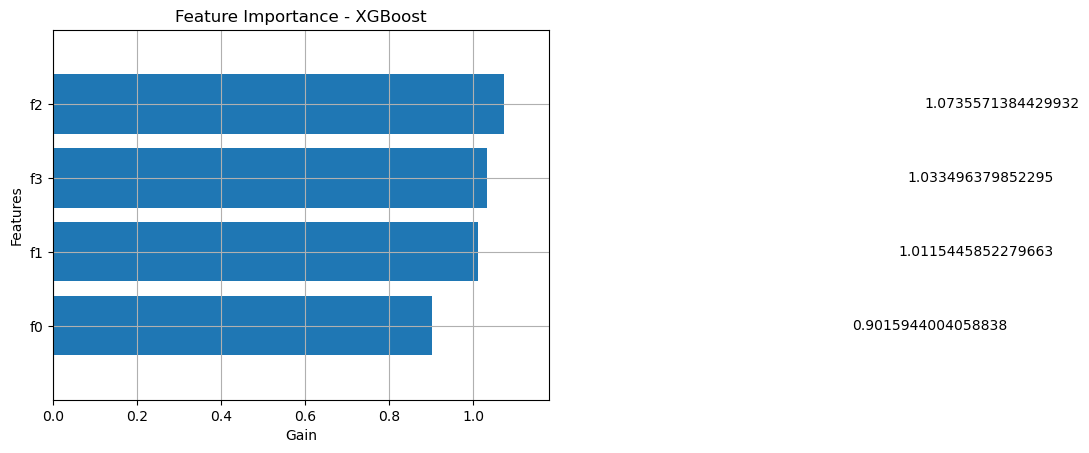

In [53]:
from xgboost import plot_importance

plot_importance(model,
                max_num_features=10, 
                height=0.8,
                importance_type='gain',
                title='Feature Importance - XGBoost',
                xlabel='Gain',
                ylabel='Features')
plt.show()